# Random forest classifier using opto-magnetic spectrum

1.   Fresh and Decay apple 
2.   Apple and potato



- Training is done by opto-magnetic imaging spectroscopy formed by using two images of each of the samples. One of the image is captured by keeping the light source (mobile flash) at approximately 90 degree to the sample and another one by keeping the light source at 53 degree. 

In [2]:
!nvidia-smi

Sun Feb 28 04:51:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Day 1

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as sk

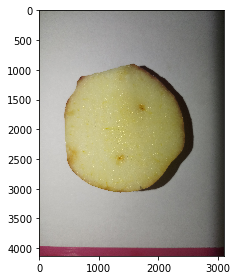

In [5]:
# light source perpendicular to sample
apple = cv.imread('/content/drive/MyDrive/OMIS/images/day1/apple_1_0.jpg')
resized_apple = cv.resize(apple, (500,500), interpolation = cv.INTER_CUBIC)
apple_rgb = cv.cvtColor(apple, cv.COLOR_BGR2RGB)
sk.imshow(apple_rgb)

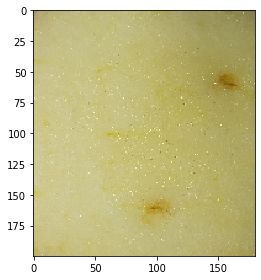

In [6]:
# Cropped image of the sliced apple 
cropped_apple = resized_apple[140:340,120:300]
cropped_apple_rgb = cv.cvtColor(cropped_apple, cv.COLOR_BGR2RGB)
sk.imshow(cropped_apple_rgb)

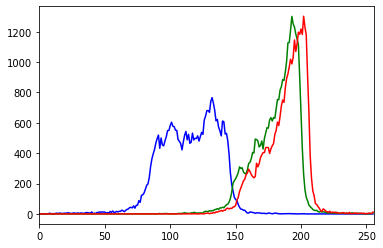

In [7]:
# Spectrum of each of the blue, green and red channels
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_apple],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

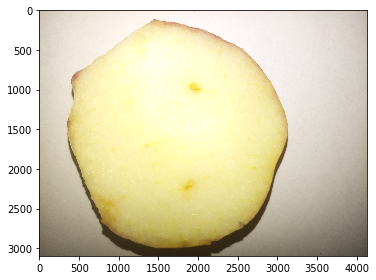

In [8]:
# light source at 53 degree angle from the plane of sample
apple53 = cv.imread('/content/drive/MyDrive/OMIS/images/day1/apple_1_53.jpg')
apple53 = cv.rotate(apple53, cv.ROTATE_90_CLOCKWISE)
resized_apple53 = cv.resize(apple53, (500,500), interpolation = cv.INTER_CUBIC)
apple53_rgb = cv.cvtColor(apple53, cv.COLOR_BGR2RGB)
sk.imshow(apple53_rgb)

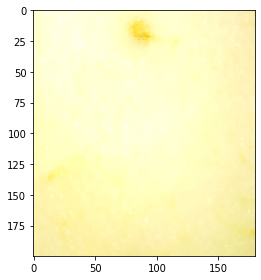

In [9]:
# Cropped image of the sliced apple
cropped_apple53 = resized_apple53[140:340,150:330]

cropped_apple53_rgb = cv.cvtColor(cropped_apple53, cv.COLOR_BGR2RGB)
sk.imshow(cropped_apple53_rgb)

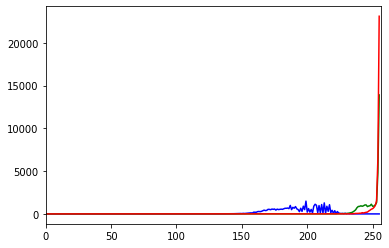

In [10]:
# Spectrum of each of the blue, green and red channels
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_apple53],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [11]:
# function for calcuating the peak from the opto-magnetic spectrum

def omis(path1,path2,c1,c2,c3,c4,d1,d2,d3,d4,r,ip,w,k,l):
  img1 = cv.imread(path1)
  resized_img = cv.resize(img1, (500,500), interpolation = cv.INTER_CUBIC)
  img2 = cv.imread(path2)
  resized_img53 = cv.resize(img2, (500,500), interpolation = cv.INTER_CUBIC)
  for i in range(r):
    cropped_img = resized_img[(c1+(i*k)):(c2+(i*k)),(c3+(i*l)):(c4+(i*l))]
    bw,gw,rw = cv.split(cropped_img)
    histbw,bins = np.histogram(bw.ravel(),255,[0,256])
    histrw,bins = np.histogram(rw.ravel(),255,[0,256])
    histbw1,histrw1 = histbw/255, histrw/255
    for j in range(r):
        cropped_img53 = resized_img53[(d1+(j*k)):(d2+(j*k)),(d3+(j*l)):(d4+(j*l))]
        bp,gp,rp = cv.split(cropped_img53)
        histbp,bins = np.histogram(bp.ravel(),255,[0,256])
        histrp,bins = np.histogram(rp.ravel(),255,[0,256])
        histbp1,histrp1 = histbp/255, histrp/255
        b1 = histbw1-histbp1
        r1 = histrw1-histrp1
        omis1 = r1-b1
        o1 = []
        for i in range(len(omis1)):
            o1.append([omis1[i]])
        ip.append(max(o1))
        w.append(o1.index(max(o1)))
  plt.figure(figsize=(8, 5))
  plt.grid(color='b', ls = '-.', lw = 0.25)
  plt.plot(o1)
  plt.xlim([0,256])
  plt.title('Opto-magnetic imaging spectrum')
  plt.show()

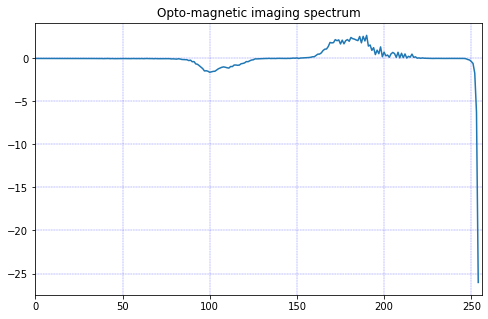

In [13]:
c1,c2,c3,c4 = 140,240,120,210
d1,d2,d3,d4 = 140,240,150,240
r = 6
k,l = 20,18
path1 = '/content/drive/MyDrive/OMIS/images/day1/apple_1_0.jpg'
path2 = '/content/drive/MyDrive/OMIS/images/day1/apple_1_53.jpg'
ip = []
w = []
omis(path1, path2, c1, c2, c3, c4, d1, d2, d3, d4, r, ip, w,k,l)

In [14]:
sample = []
for i in range(len(ip)):
  sample.append('apple')

In [15]:
len(sample)

36

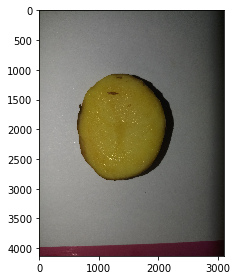

In [16]:
# image of potato captured by keeping the light source at 90 degree
img = cv.imread('/content/drive/MyDrive/OMIS/images/day1/potato_1_0.jpg')
resized_img = cv.resize(img, (500,500), interpolation = cv.INTER_CUBIC)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
sk.imshow(img_rgb)

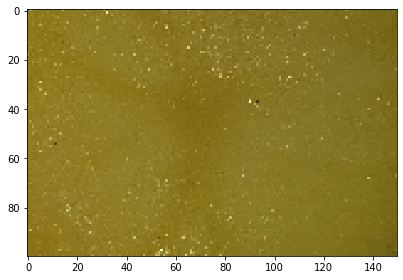

In [17]:
cropped_img = resized_img[200:300,150:300]
cropped_img_rgb = cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB)
sk.imshow(cropped_img_rgb)

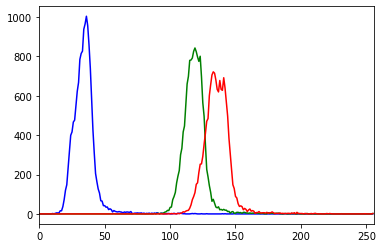

In [18]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

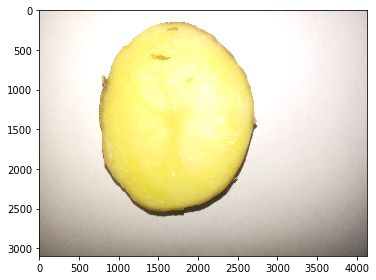

In [19]:
img53 = cv.imread('/content/drive/MyDrive/OMIS/images/day1/potato_1_53.jpg')
img53 = cv.rotate(img53, cv.ROTATE_90_CLOCKWISE)
resized_img53 = cv.resize(img53, (500,500), interpolation = cv.INTER_CUBIC)
img53_rgb = cv.cvtColor(img53, cv.COLOR_BGR2RGB)
sk.imshow(img53_rgb)

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


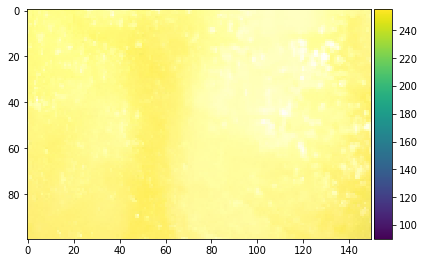

In [20]:
cropped_img53 = resized_img53[200:300,150:300]
cropped_img53_rgb = cv.cvtColor(cropped_img53, cv.COLOR_BGR2RGB)
sk.imshow(cropped_img53_rgb)

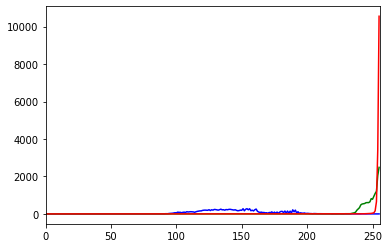

In [21]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_img53],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

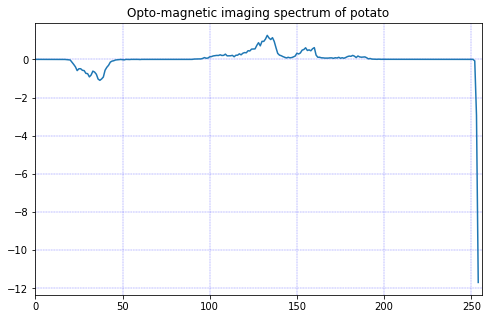

In [22]:
c1,c2,c3,c4 = 200,250,150,225
d1,d2,d3,d4 = 200,250,150,225
r = 2
k,l = 50,75
path1 = '/content/drive/MyDrive/OMIS/images/day1/potato_1_0.jpg'
path2 = '/content/drive/MyDrive/OMIS/images/day1/potato_1_53.jpg'
ip1 = []
w1 = []
omis(path1, path2, c1, c2, c3, c4, d1, d2, d3, d4, r, ip1, w1,k,l)

In [23]:
for i in range(len(ip1)):
  sample.append('potato')

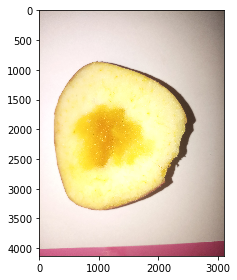

In [24]:
img = cv.imread('/content/drive/MyDrive/OMIS/images/day1/decay_apple_1_0.jpg')
resized_img = cv.resize(img, (500,500), interpolation = cv.INTER_CUBIC)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
sk.imshow(img_rgb)

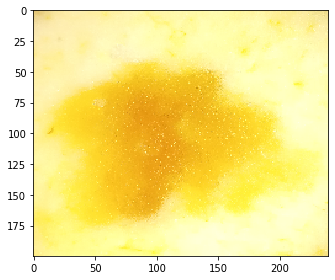

In [25]:
cropped_img = resized_img[150:350,80:320]
cropped_img_rgb = cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB)
sk.imshow(cropped_img_rgb)

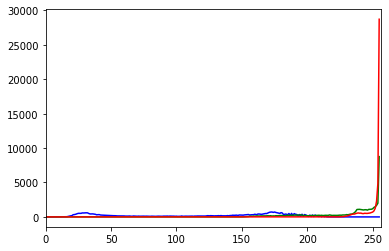

In [26]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

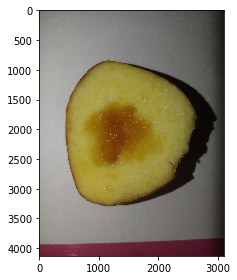

In [27]:
img53 = cv.imread('/content/drive/MyDrive/OMIS/images/day1/decay_apple_1_53.jpg')
resized_img53 = cv.resize(img53, (500,500), interpolation = cv.INTER_CUBIC)
img53_rgb = cv.cvtColor(img53, cv.COLOR_BGR2RGB)
sk.imshow(img53_rgb)

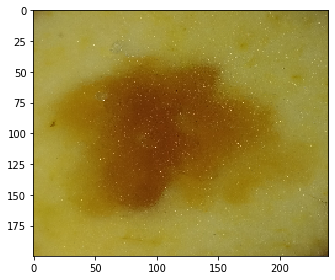

In [28]:
cropped_img53 = resized_img53[150:350,110:350]
cropped_img53_rgb = cv.cvtColor(cropped_img53, cv.COLOR_BGR2RGB)
sk.imshow(cropped_img53_rgb)

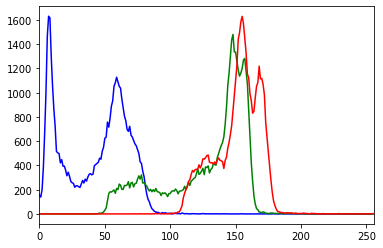

In [29]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_img53],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

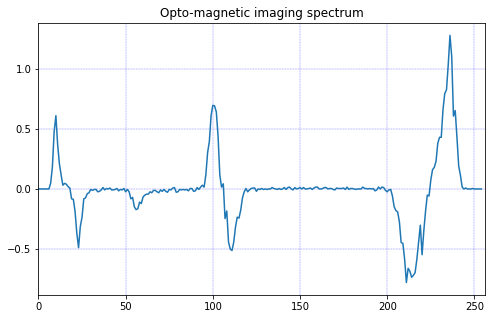

In [30]:
c1,c2,c3,c4 = 150,200,80,140
d1,d2,d3,d4 = 150,200,110,170
r = 5
k,l = 50,60
path1 = '/content/drive/MyDrive/OMIS/images/day1/decay_apple_1_0.jpg'
path2 = '/content/drive/MyDrive/OMIS/images/day1/decay_apple_1_53.jpg'
ip2 = []
w2 = []
omis(path1, path2, c1, c2, c3, c4, d1, d2, d3, d4, r, ip2, w2,k,l)

In [31]:
for i in range(len(ip2)):
  sample.append('decay apple')

### day 2

- Images of same samples captured on 2nd day

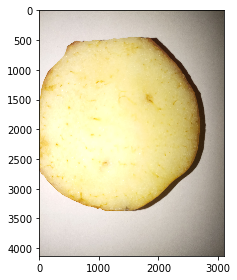

In [32]:
img = cv.imread('/content/drive/MyDrive/OMIS/images/day2/apple_0.jpg')
resized_img = cv.resize(img, (500,500), interpolation = cv.INTER_CUBIC)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
sk.imshow(img_rgb)

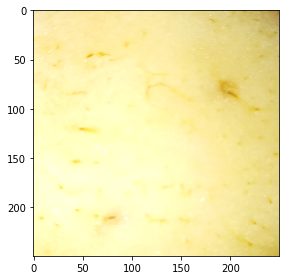

In [33]:
cropped_img = resized_img[100:350,100:350]
cropped_img_rgb = cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB)
sk.imshow(cropped_img_rgb)

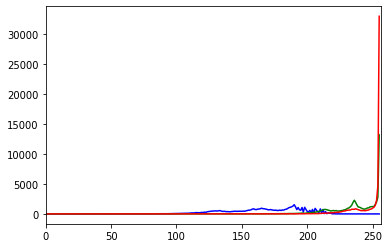

In [34]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

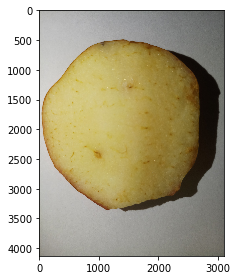

In [35]:
img53 = cv.imread('/content/drive/MyDrive/OMIS/images/day2/apple_53.jpg')
resized_img53 = cv.resize(img53, (500,500), interpolation = cv.INTER_CUBIC)
img53_rgb = cv.cvtColor(img53, cv.COLOR_BGR2RGB)
sk.imshow(img53_rgb)

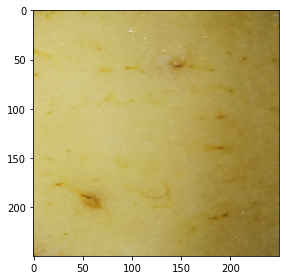

In [36]:
cropped_img53 = resized_img53[100:350,100:350]
cropped_img53_rgb = cv.cvtColor(cropped_img53, cv.COLOR_BGR2RGB)
sk.imshow(cropped_img53_rgb)

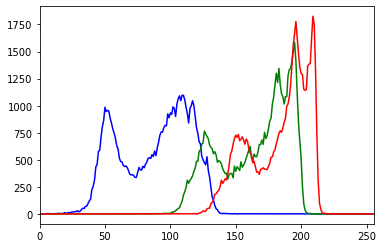

In [37]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_img53],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

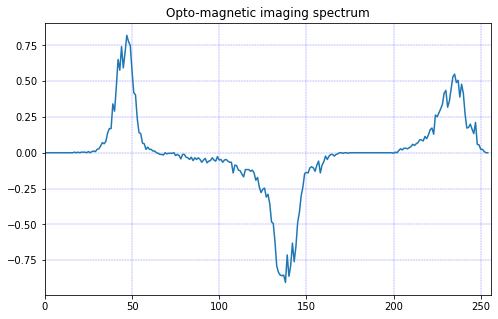

In [38]:
c1,c2,c3,c4 = 100,150,100,150
d1,d2,d3,d4 = 100,150,100,150
r = 5
k,l = 50,50
path1 = '/content/drive/MyDrive/OMIS/images/day2/apple_0.jpg'
path2 = '/content/drive/MyDrive/OMIS/images/day2/apple_53.jpg'
ip3 = []
w3 = []
omis(path1, path2, c1, c2, c3, c4, d1, d2, d3, d4, r, ip3, w3,k,l)

In [39]:
for i in range(len(ip3)):
  sample.append('apple')

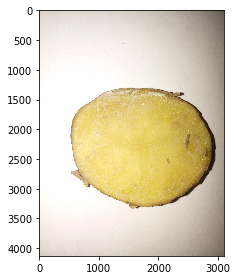

In [40]:
img = cv.imread('/content/drive/MyDrive/OMIS/images/day2/potato_0.jpg')
resized_img = cv.resize(img, (500,500), interpolation = cv.INTER_CUBIC)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
sk.imshow(img_rgb)

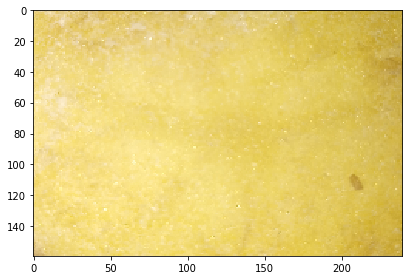

In [41]:
cropped_img = resized_img[195:355,140:380]
cropped_img_rgb = cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB)
sk.imshow(cropped_img_rgb)

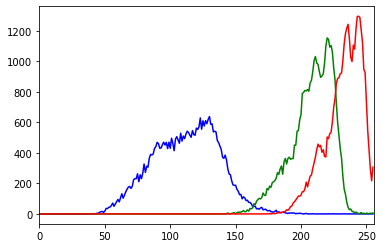

In [42]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

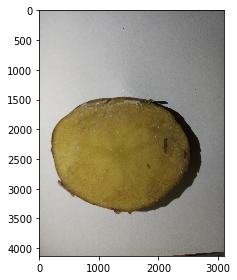

In [43]:
img53 = cv.imread('/content/drive/MyDrive/OMIS/images/day2/potato_53.jpg')
resized_img53 = cv.resize(img53, (500,500), interpolation = cv.INTER_CUBIC)
img53_rgb = cv.cvtColor(img53, cv.COLOR_BGR2RGB)
sk.imshow(img53_rgb)

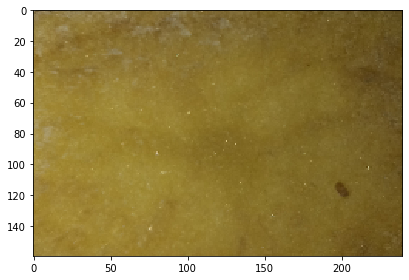

In [44]:
cropped_img53 = resized_img53[200:360,95:335]
cropped_img53_rgb = cv.cvtColor(cropped_img53, cv.COLOR_BGR2RGB)
sk.imshow(cropped_img53_rgb)

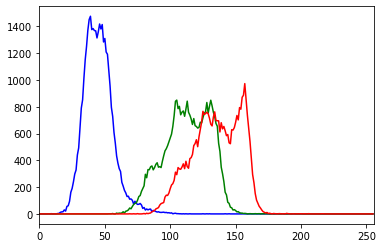

In [45]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_img53],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

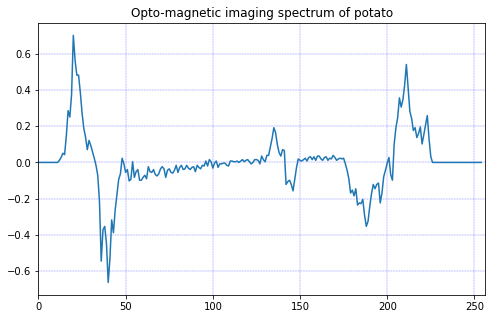

In [46]:
c1,c2,c3,c4 = 195,235,140,200
d1,d2,d3,d4 = 200,240,95,155
r = 5
k,l = 40,60
path1 = '/content/drive/MyDrive/OMIS/images/day2/potato_0.jpg'
path2 = '/content/drive/MyDrive/OMIS/images/day2/potato_53.jpg'
ip4 = []
w4 = []
omis(path1, path2, c1, c2, c3, c4, d1, d2, d3, d4, r, ip4, w4,k,l)

In [47]:
for i in range(len(ip4)):
  sample.append('potato')

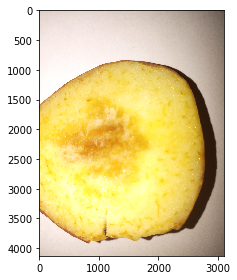

In [48]:
img = cv.imread('/content/drive/MyDrive/OMIS/images/day2/decay_apple_0.jpg')
resized_img = cv.resize(img, (500,500), interpolation = cv.INTER_CUBIC)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
sk.imshow(img_rgb)

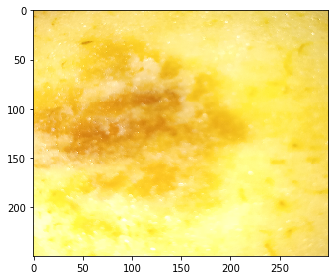

In [49]:
cropped_img = resized_img[150:400,80:380]
cropped_img_rgb = cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB)
sk.imshow(cropped_img_rgb)

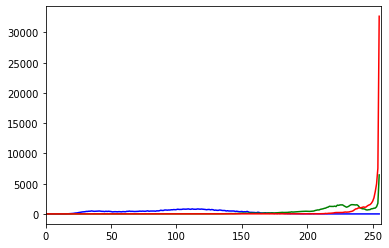

In [50]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

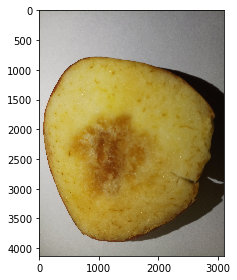

In [51]:
img53 = cv.imread('/content/drive/MyDrive/OMIS/images/day2/decay_apple_53.jpg')
resized_img53 = cv.resize(img53, (500,500), interpolation = cv.INTER_CUBIC)
img53_rgb = cv.cvtColor(img53, cv.COLOR_BGR2RGB)
sk.imshow(img53_rgb)

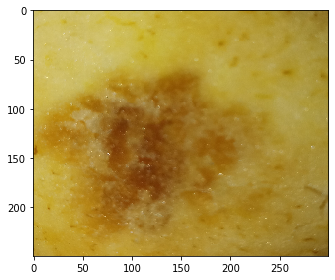

In [52]:
cropped_img53 = resized_img53[150:400,80:380]
cropped_img53_rgb = cv.cvtColor(cropped_img53, cv.COLOR_BGR2RGB)
sk.imshow(cropped_img53_rgb)

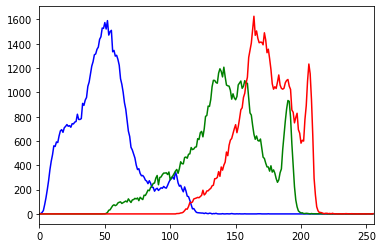

In [53]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_img53],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

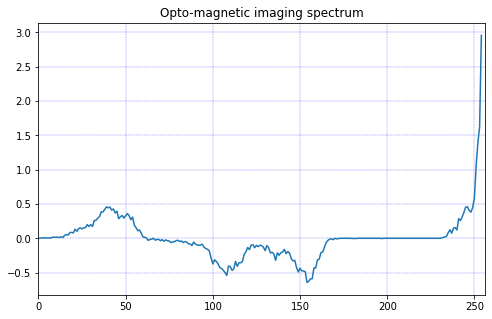

In [54]:
c1,c2,c3,c4 = 150,200,80,140
d1,d2,d3,d4 = 150,200,80,140
r = 5
k,l = 50,60
path1 = '/content/drive/MyDrive/OMIS/images/day2/decay_apple_0.jpg'
path2 = '/content/drive/MyDrive/OMIS/images/day2/decay_apple_53.jpg'
ip5 = []
w5 = []
omis(path1, path2, c1, c2, c3, c4, d1, d2, d3, d4, r, ip5, w5,k,l)

In [55]:
for i in range(len(ip5)):
  sample.append('decay apple')

### Day 3

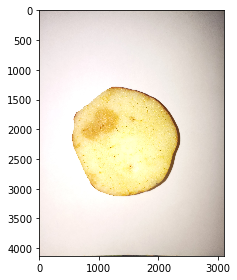

In [56]:
img = cv.imread('/content/drive/MyDrive/OMIS/images/day3/apple_0.jpg')
resized_img = cv.resize(img, (500,500), interpolation = cv.INTER_CUBIC)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
sk.imshow(img_rgb)

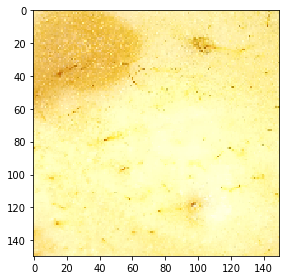

In [57]:
cropped_img = resized_img[200:350,150:300]
cropped_img_rgb = cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB)
sk.imshow(cropped_img_rgb)

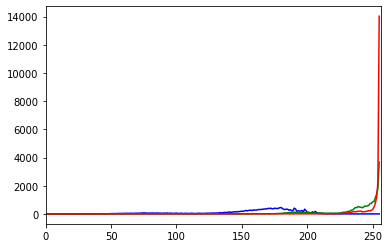

In [58]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

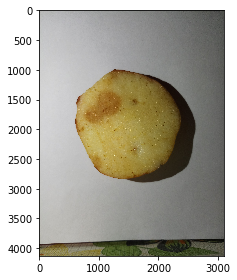

In [59]:
img53 = cv.imread('/content/drive/MyDrive/OMIS/images/day3/apple_53.jpg')
resized_img53 = cv.resize(img53, (500,500), interpolation = cv.INTER_CUBIC)
img53_rgb = cv.cvtColor(img53, cv.COLOR_BGR2RGB)
sk.imshow(img53_rgb)

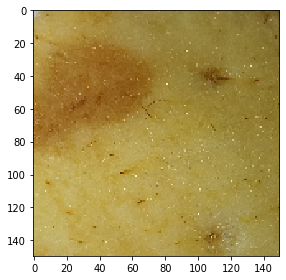

In [60]:
cropped_img53 = resized_img53[145:295,150:300]
cropped_img53_rgb = cv.cvtColor(cropped_img53, cv.COLOR_BGR2RGB)
sk.imshow(cropped_img53_rgb)

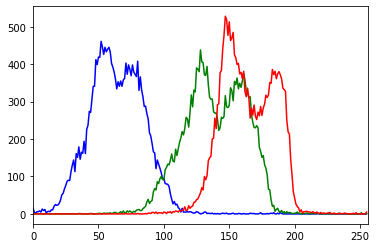

In [61]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_img53],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

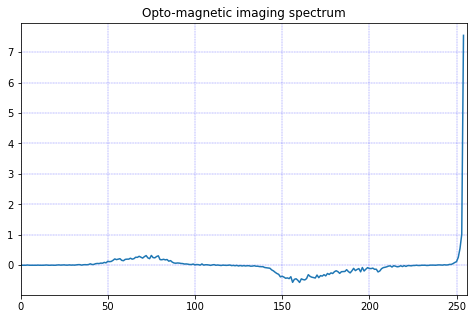

In [62]:
c1,c2,c3,c4 = 200,250,150,200
d1,d2,d3,d4 = 145,195,150,200
r = 3
k,l = 50,50
path1 = '/content/drive/MyDrive/OMIS/images/day3/apple_0.jpg'
path2 = '/content/drive/MyDrive/OMIS/images/day3/apple_53.jpg'
ip6 = []
w6 = []
omis(path1, path2, c1, c2, c3, c4, d1, d2, d3, d4, r, ip6, w6,k,l)

In [63]:
for i in range(len(ip6)):
  sample.append('apple')

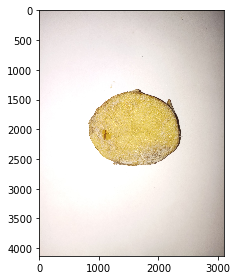

In [64]:
img = cv.imread('/content/drive/MyDrive/OMIS/images/day3/potato_0.jpg')
resized_img = cv.resize(img, (500,500), interpolation = cv.INTER_CUBIC)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
sk.imshow(img_rgb)

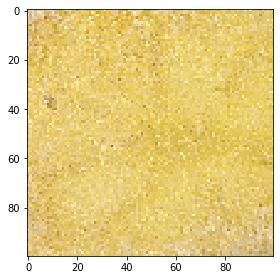

In [65]:
cropped_img = resized_img[190:290,200:300]
cropped_img_rgb = cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB)
sk.imshow(cropped_img_rgb)

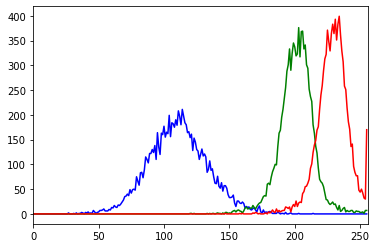

In [66]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


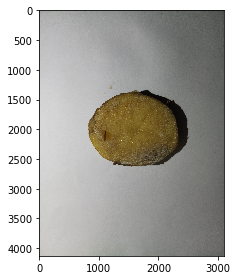

In [67]:
img53 = cv.imread('/content/drive/MyDrive/OMIS/images/day3/potato_53.jpg')
resized_img53 = cv.resize(img53, (500,500), interpolation = cv.INTER_CUBIC)
img53_rgb = cv.cvtColor(img53, cv.COLOR_BGR2RGB)
sk.imshow(img53_rgb)

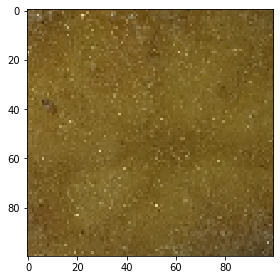

In [68]:
cropped_img53 = resized_img53[190:290,200:300]
cropped_img53_rgb = cv.cvtColor(cropped_img53, cv.COLOR_BGR2RGB)
sk.imshow(cropped_img53_rgb)

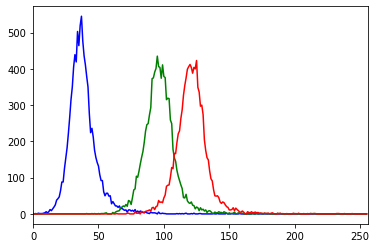

In [69]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_img53],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

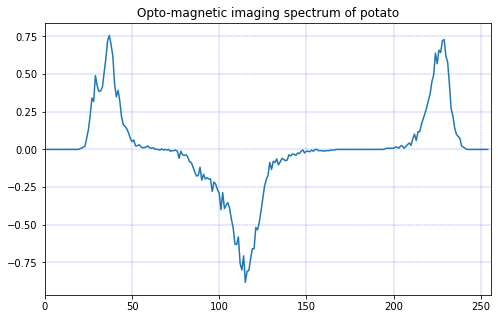

In [70]:
c1,c2,c3,c4 = 190,240,200,250
d1,d2,d3,d4 = 190,240,200,250
r = 2
k,l = 50,50
path1 = '/content/drive/MyDrive/OMIS/images/day3/potato_0.jpg'
path2 = '/content/drive/MyDrive/OMIS/images/day3/potato_53.jpg'
ip7 = []
w7 = []
omis(path1, path2, c1, c2, c3, c4, d1, d2, d3, d4, r, ip7, w7,k,l)

In [71]:
for i in range(len(ip7)):
  sample.append('potato')

### Day 4

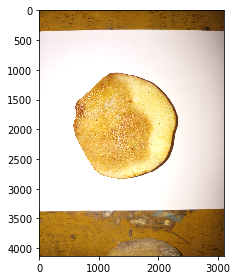

In [72]:
img = cv.imread('/content/drive/MyDrive/OMIS/images/day4/apple_0.jpg')
resized_img = cv.resize(img, (500,500), interpolation = cv.INTER_CUBIC)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
sk.imshow(img_rgb)

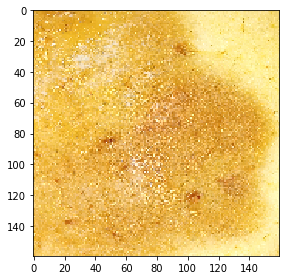

In [73]:
cropped_img = resized_img[160:320,150:310]
cropped_img_rgb = cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB)
sk.imshow(cropped_img_rgb)

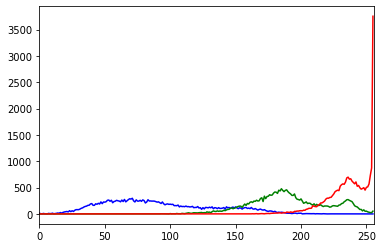

In [74]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

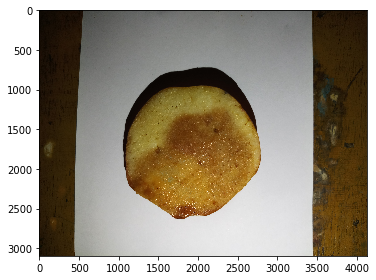

In [75]:
img53 = cv.imread('/content/drive/MyDrive/OMIS/images/day4/apple_53.jpg')
resized_img53 = cv.resize(img53, (500,500), interpolation = cv.INTER_CUBIC)
img53_rgb = cv.cvtColor(img53, cv.COLOR_BGR2RGB)
sk.imshow(img53_rgb)

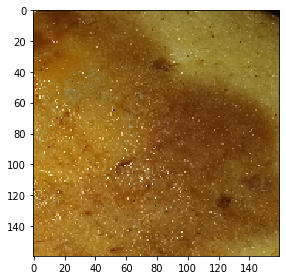

In [76]:
cropped_img53 = resized_img53[210:370,145:305]
cropped_img53 = cv.rotate(cropped_img53, cv.ROTATE_90_CLOCKWISE)
cropped_img53_rgb = cv.cvtColor(cropped_img53, cv.COLOR_BGR2RGB)
sk.imshow(cropped_img53_rgb)

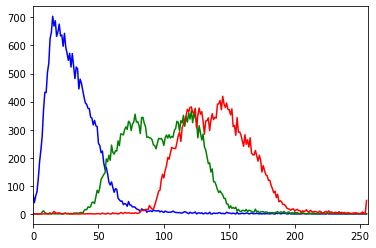

In [77]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_img53],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

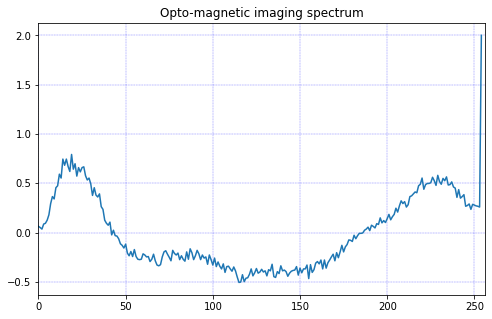

In [78]:
c1,c2,c3,c4 = 160,240,150,230
d1,d2,d3,d4 = 210,290,145,225
r = 2
k,l = 50,50
path1 = '/content/drive/MyDrive/OMIS/images/day4/apple_0.jpg'
path2 = '/content/drive/MyDrive/OMIS/images/day4/apple_53.jpg'
ip8 = []
w8 = []
omis(path1, path2, c1, c2, c3, c4, d1, d2, d3, d4, r, ip8, w8,k,l)

In [79]:
for i in range(len(ip8)):
  sample.append('decay apple')

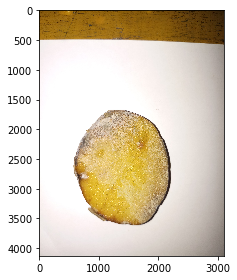

In [80]:
img = cv.imread('/content/drive/MyDrive/OMIS/images/day4/potato_0.jpg')
resized_img = cv.resize(img, (500,500), interpolation = cv.INTER_CUBIC)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
sk.imshow(img_rgb)

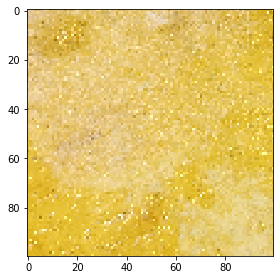

In [81]:
cropped_img = resized_img[280:380,150:250]
cropped_img_rgb = cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB)
sk.imshow(cropped_img_rgb)

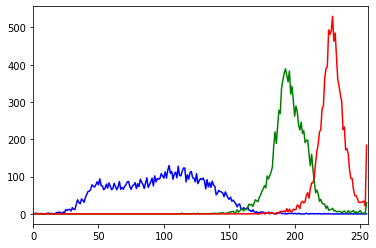

In [82]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

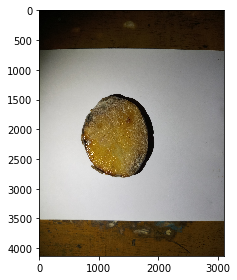

In [83]:
img53 = cv.imread('/content/drive/MyDrive/OMIS/images/day4/potato_53.jpg')
resized_img53 = cv.resize(img53, (500,500), interpolation = cv.INTER_CUBIC)
img53_rgb = cv.cvtColor(img53, cv.COLOR_BGR2RGB)
sk.imshow(img53_rgb)

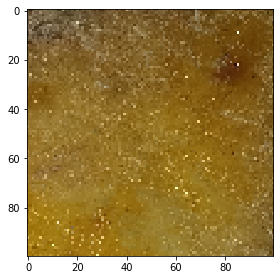

In [84]:
cropped_img53 = resized_img53[200:300,160:260]
cropped_img53_rgb = cv.cvtColor(cropped_img53, cv.COLOR_BGR2RGB)
sk.imshow(cropped_img53_rgb)

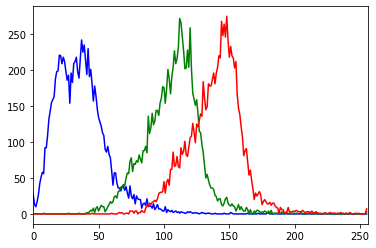

In [85]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([cropped_img53],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

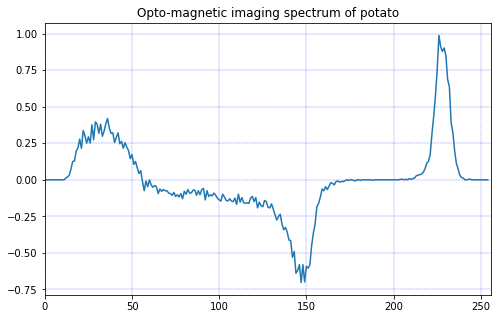

In [86]:
c1,c2,c3,c4 = 280,330,150,200
d1,d2,d3,d4 = 200,250,150,210
r = 2
k,l = 50,50
path1 = '/content/drive/MyDrive/OMIS/images/day4/potato_0.jpg'
path2 = '/content/drive/MyDrive/OMIS/images/day4/potato_53.jpg'
ip9 = []
w9 = []
omis(path1, path2, c1, c2, c3, c4, d1, d2, d3, d4, r, ip9, w9,k,l)

In [87]:
for i in range(len(ip9)):
  sample.append('potato')

In [88]:
ip = ip + ip1 + ip2 + ip3 + ip4 + ip5 +ip6 + ip7 + ip8 + ip9
w = w + w1 + w2 + w3 + w4 + w5 + w6 + w7 + w8 + w9

In [89]:
ipr = []
for i in range(len(ip)):
  ipr.append(ip[i][0])
print(ipr)

[4.780392156862746, 4.890196078431373, 5.3803921568627455, 4.850980392156863, 4.458823529411765, 3.6039215686274515, 4.709803921568628, 4.8196078431372555, 5.309803921568628, 4.780392156862745, 4.3882352941176475, 3.533333333333333, 4.3843137254901965, 4.4941176470588236, 4.984313725490196, 4.454901960784314, 4.0627450980392155, 3.207843137254902, 4.113725490196078, 4.223529411764706, 4.713725490196079, 4.184313725490195, 3.792156862745098, 2.9372549019607845, 3.023529411764706, 3.1333333333333337, 3.6235294117647063, 3.2745098039215685, 2.8627450980392157, 2.8901960784313725, 2.682352941176471, 2.8627450980392157, 3.1215686274509804, 3.317647058823529, 2.9725490196078432, 2.686274509803922, 1.5450980392156861, 1.552941176470588, 1.2431372549019608, 1.2588235294117647, 5.454901960784314, 5.454901960784314, 5.454901960784314, 5.454901960784314, 5.454901960784314, 0.819607843137255, 1.576470588235294, 0.9372549019607843, 0.6823529411764706, 0.6823529411764706, 3.5843137254901962, 3.58431

In [90]:
import pandas as pd
omis = pd.DataFrame(list(zip(ipr, w,sample)), 
               columns =['Peaks', 'Intensity_value', 'sample']) 

In [91]:
omis1 = pd.DataFrame(list(zip(ipr, w,sample)), 
               columns =['Peaks', 'Intensity_value', 'sample']) 

In [92]:
omis

Peaks  Intensity_value       sample
0    4.780392              198        apple
1    4.890196              198        apple
2    5.380392              198        apple
3    4.850980              198        apple
4    4.458824              198        apple
..        ...              ...          ...
156  2.000000              254  decay apple
157  0.882353              231       potato
158  0.882353              231       potato
159  0.988235              226       potato
160  0.988235              226       potato

[161 rows x 3 columns]

In [93]:
#omis.drop_duplicates(inplace = True)

In [94]:
omis['sample'].value_counts()

apple          70
decay apple    54
potato         37
Name: sample, dtype: int64

In [95]:
omis.drop(omis[omis["sample"] == 'potato'].index, inplace = True)

In [96]:
omis1.drop(omis[omis["sample"] == 'decay apple'].index, inplace = True)

In [97]:
omis

Peaks  Intensity_value       sample
0    4.780392              198        apple
1    4.890196              198        apple
2    5.380392              198        apple
3    4.850980              198        apple
4    4.458824              198        apple
..        ...              ...          ...
148  7.549020              254        apple
153  2.439216              254  decay apple
154  2.372549              254  decay apple
155  2.066667              254  decay apple
156  2.000000              254  decay apple

[124 rows x 3 columns]

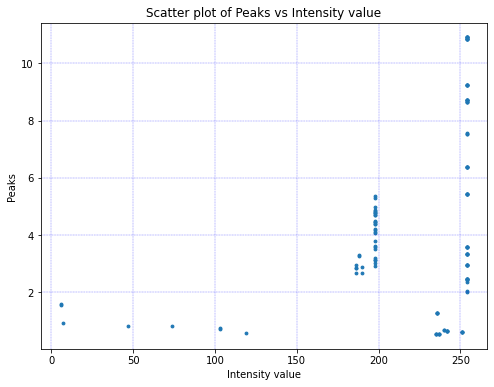

In [98]:
# peaks of the opto-magnetic spectrum
plt.figure(figsize=(8,6))
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.xlabel('Intensity value')
plt.ylabel('Peaks')
plt.title('Scatter plot of Peaks vs Intensity value')
plt.scatter(omis.Intensity_value, omis.Peaks, s = 8)
plt.show()

In [99]:
decay_apple = pd.get_dummies(omis['sample'],drop_first=True)
omis.drop(['sample'],axis=1,inplace=True)
omis = pd.concat([omis,decay_apple],axis=1)

In [100]:
apple = pd.get_dummies(omis1['sample'],drop_first=True)
omis1.drop(['sample'],axis=1,inplace=True)
omis1 = pd.concat([omis1,apple],axis=1)

In [101]:
omis

Peaks  Intensity_value  decay apple
0    4.780392              198            0
1    4.890196              198            0
2    5.380392              198            0
3    4.850980              198            0
4    4.458824              198            0
..        ...              ...          ...
148  7.549020              254            0
153  2.439216              254            1
154  2.372549              254            1
155  2.066667              254            1
156  2.000000              254            1

[124 rows x 3 columns]

# Classification for classifying apple and decayed apple

In [102]:
X = omis.iloc[:, :-1].values
y = omis.iloc[:, -1].values

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Logistic regression

In [104]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  1]
 [ 4  7]]


0.8

## KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [107]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  2]
 [ 0 11]]


0.92

## SVM

In [108]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [109]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  2]
 [ 2  9]]


0.84

## Naive Bayes

In [110]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [111]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  1]
 [ 9  2]]


0.6

## Decision tree

In [112]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [113]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  1]
 [ 0 11]]


0.96

## Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  1]
 [ 0 11]]


0.96

Random forest classification model having 96 percent accuracy in correctly classifying apple and a decayed apple. 

# Classification for classifying apple and potato

In [116]:
omis1

Peaks  Intensity_value  potato
0    4.780392              198       0
1    4.890196              198       0
2    5.380392              198       0
3    4.850980              198       0
4    4.458824              198       0
..        ...              ...     ...
152  0.756863               37       1
157  0.882353              231       1
158  0.882353              231       1
159  0.988235              226       1
160  0.988235              226       1

[107 rows x 3 columns]

In [117]:
X = omis1.iloc[:, :-1].values
y = omis1.iloc[:, -1].values

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [119]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0]
 [ 0 11]]


1.0

This model is giving 100 accuracy which may be overfitted model

In [121]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0]
 [ 0 11]]


1.0